# Lecture 13 - Optimization
### This notebook walks through the steps of finding an optimum reactant concentration that maximizes instantaneous specificity to a desired product in a network of competing reactions

We focus our discussion around the Trambouze reaction network
1. A --> X (0 order in A) k1 = 0.0001 mol/L-s
2.  A --> B (1st order in A) k2 = 0.0015 1/s
3.  A --> Y (2nd order in A) k3 = 0.008 (L/mol-s)^2

B is the desired product, and we wish to know what concentration of A maximizes the instantaneous selectivity, defined as:

$$\frac{r_2}{\sum_i r_i}$$

where i refers to the reaction number. Earlier in class we derived an analytical solution to this problem by writing the rate equation for each reaction, using that to write an expression for the selectivity, and finding the maximum by setting the derivative equal to 0 and solving for the associated $C_A$. Because not all problems of this nature will have a nice analytical solution, here we will use numerical optimization using the scipy.optimize package to find that same $C_A$.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar #There are two commonly used optimization functions, depending whether your function of inters returns a scalar or a vector.
from scipy.optimize import minimize
%matplotlib inline

In [5]:
T0 = 300 #K
k1 = 0.0001
k2 = 0.0015
k3 = 0.008

#### Define function to calculate selectivity

In [6]:
#Define a function that returns the selectivity for a given CA
def trambouze_selectivity(CA, k1, k2, k3):
    C = np.array([CA, CA, CA])
    k = np.array([k1, k2, k3])
    order = np.array([0, 1, 2])
    rate = k*C**order #Calculate the rates in an array
    selectivity = rate[1]/np.sum(rate)  #Definition of instantaneous selectivity
    return -1*selectivity #Here we are returning -1*selectivity, since minimizing the negative is the same as maximizing the positive

In [7]:
#Test the function
trambouze_selectivity(0.1, k1, k2, k3)

-0.4545454545454546

#### Plot selectivity over a reasonable range of concentrations

Text(0, 0.5, 'Selectivity')

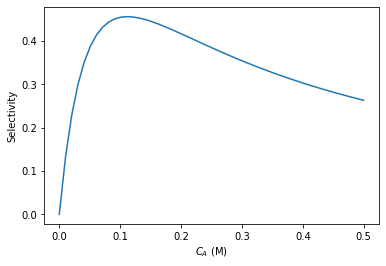

In [8]:
#Plot selectivity vs CA over a reasonable range
CA_range = np.linspace(0, 0.5, 50)
selectivity = np.zeros(len(CA_range))
#Use a for loop to calculate the selectivity at each CA in CA_range (this could probably be vectorized, but this is OK for now)
for i in range(len(CA_range)):
        selectivity[i] = trambouze_selectivity(CA_range[i], k1, k2, k3)
 
#Plot the results
plt.plot(CA_range, -1*selectivity)
plt.xlabel(r'$C_A$ (M)')
plt.ylabel('Selectivity')

#### Use minimize_scalar from scipy.optimize to find the value of CA that minimizes our function
Additional documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html

In [9]:
#Here we call the function minimize_scalar, which at a minimum requries the function to be minized.
#It can also take additional arguments, such as an initial guess, and a tuple of arguments to pass to the function
CA_opt = minimize_scalar(trambouze_selectivity, args = (k1, k2, k3))

In [10]:
#THe object returned, CA_opt, deserves some attention
CA_opt

     fun: -0.45608586631552384
    nfev: 19
     nit: 15
 success: True
       x: 0.11180340048575467

In [11]:
#To extract the optimum x value
CA_opt.x

0.11180340048575467

In [12]:
#To extract the value of the functino at that point
CA_opt.fun

-0.45608586631552384

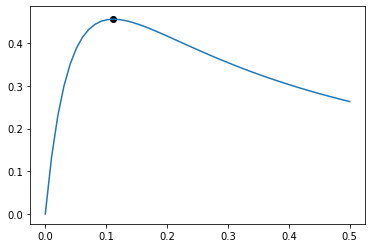

In [13]:
#Use these to overlay our optimum on the plot

#Plot hte originla data
plt.plot(CA_range, -1*selectivity)

#Overlay
plt.scatter(CA_opt.x, -1*CA_opt.fun, color = 'k')

We could also have use the vectorized version of the function. It's a little silly in this example because we're only optimizing one variable (CA), but in cases where you want to SIMULTANEOUSLY optimize multiple parameters - e.g. let's say you had a rate law that depended on CA and CB - this form will allow you to do that by passsing them in as a vector [CA, CB]

In [19]:
#Define a function that returns the selectivity for a given CA
def selectivity_vector(C, k1, k2, k3):
    CA = C[0]
    selectivity = k2*CA/(k1+k2*CA+k3*CA**2)  #Definition of instantaneous selectivity
    return -1*selectivity #Here we are returning -1*selectivity, since minimizing the negative is the same as maximizing the positive

In [21]:
#Here we call the function minimize_scalar, which at a minimum requries the function to be minized.
#It can also take additional arguments, such as an initial guess, and a tuple of arguments to pass to the function
CA_opt_vector = minimize(selectivity_vector, x0 = [0.2], args = (k1, k2, k3))

In [22]:
CA_opt_vector

      fun: -0.4560858663155232
 hess_inv: array([[0.0504207]])
      jac: array([-7.4505806e-09])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([0.11180339])